In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn  #> 학습 위해 만들어 놓은 패키지

import warnings
warnings.filterwarnings("ignore")

from matplotlib import rc, font_manager, rcParams
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family=font_name)
rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# 인공신경망(딥러닝)

    - 다층 퍼셉트론(Multilayer Perceptrons, MLP): 인공신경망의 시초
    
    - 비교적 간단한 분류와 회귀에서 사용
    
    - 피드 포워드(Feed Forward) 신경망, 신경망, 완전 연결 신경망(Fully Connected Neural Network)이라고도 부른다
    
    - 활성화 함수
        + Sigmoid(0과 1사이의 값: Backpropagation 중 값 의미 손실) 
        + Relu(최대값을 데이터의 최대값으로 쓸 수 있다)
        + tanh(1과 -1 사이로 경계선 확장)

In [1]:
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"

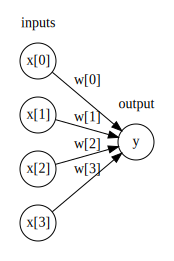

In [3]:
mglearn.plots.plot_logistic_regression_graph()

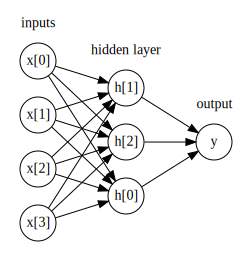

In [4]:
mglearn.plots.plot_single_hidden_layer_graph()  #> 완전 연결 계층: 기본적인 인공신경망 구조

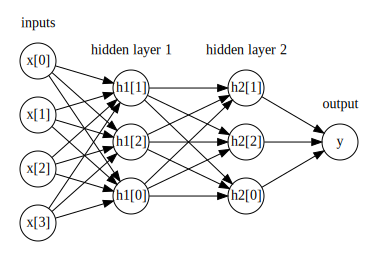

In [5]:
mglearn.plots.plot_two_hidden_layer_graph()  #> 다층 퍼셉트론

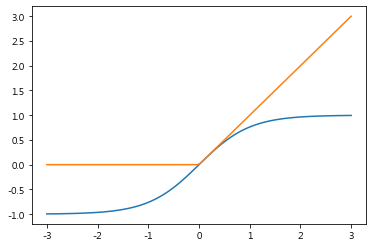

In [8]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line))  #> -1~1 사이의 tanh로 변경
plt.plot(line, np.maximum(line, 0))  #> Relu 변경(최대값을 데이터 가장 최대값으로 사용): 가장 많이 사용되는 활성화 함수

## 신경망 튜닝

    - alpha 값 통해 복잡도 조절

In [9]:
from sklearn.datasets import make_moons
from sklearn.neural_network import MLPClassifier

In [10]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [16]:
mlp = MLPClassifier(solver="lbfgs", random_state=0).fit(X_train, y_train)  #> 100개의 데이터에 대해서 은닉층 값 100개

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

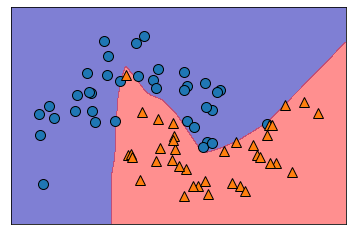

In [15]:
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.5)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

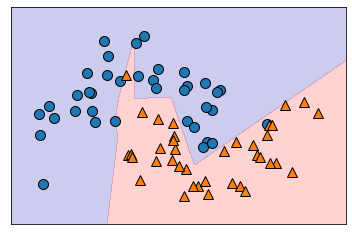

In [19]:
mlp = MLPClassifier(solver="lbfgs", random_state=0, hidden_layer_sizes=[10]).fit(X_train, y_train)  
    #> 은닉층 값 10개로 조절(학습량↓)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.2)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)  #> 경계선이 부드럽지 않음

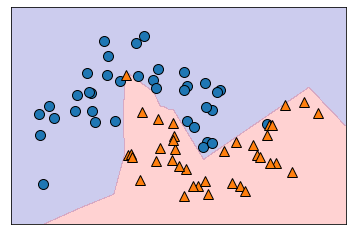

In [20]:
mlp = MLPClassifier(solver="lbfgs", random_state=0, hidden_layer_sizes=[10, 10]).fit(X_train, y_train)  
    #> 은닉층의 층 수를 늘림
    #> solver= 오차 보정 위한 알고리즘 지정(sgd, adam, lbfgs)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.2)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train) 

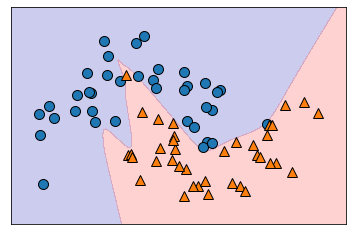

In [21]:
mlp = MLPClassifier(solver="lbfgs", random_state=0, hidden_layer_sizes=[10, 10], activation="tanh").fit(X_train, y_train)
    #> 활성화 함수 변경(기본값 Relu)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.2)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train) 

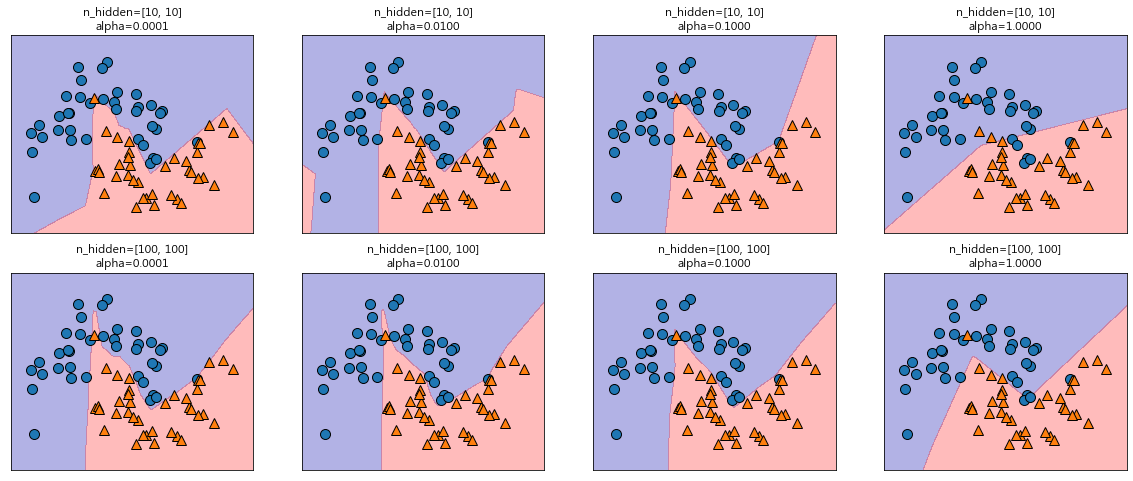

In [22]:
# 알파값 통한 복잡도 조절(데이터 경계선 변화): 알파값 작을수록 데이터 경계선 정교하다
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver="lbfgs", random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

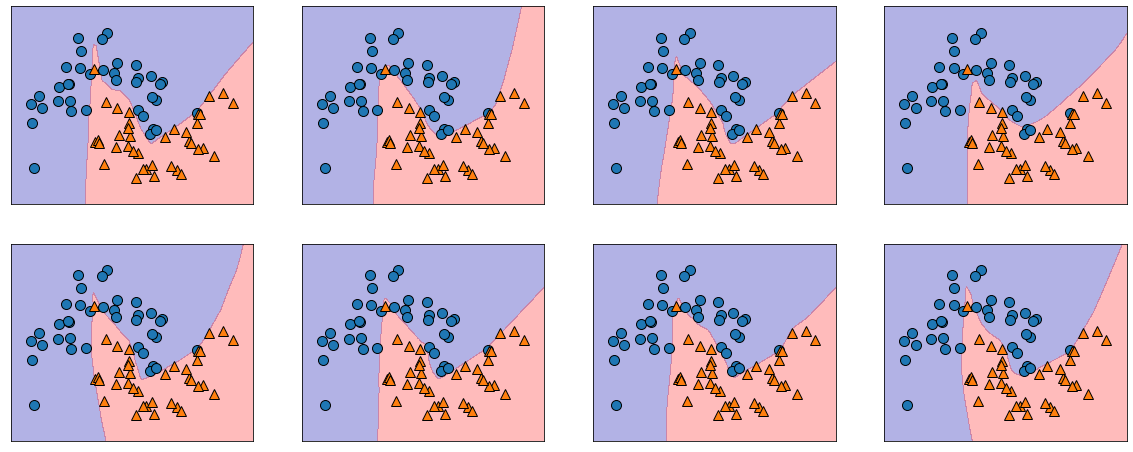

In [23]:
# 가중치에 대한 초기값 변경(random_state값 변경)
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver="lbfgs", random_state=i, hidden_layer_sizes=[100, 100]).fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

### 실제 데이터 활용

In [24]:
### 유방암 데이터 이용한 다층 퍼셉트론

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [25]:
mlp = MLPClassifier(random_state=42).fit(X_train, y_train)

In [26]:
print("훈련 정확도: ", mlp.score(X_train, y_train))
print("예측 정확도: ", mlp.score(X_test, y_test))

훈련 정확도:  0.9389671361502347
예측 정확도:  0.916083916083916


In [28]:
print("특성별 최대값: \n{}" .format(cancer.data.max(axis=0)))  #> 스케일 조정 여지 있음

특성별 최대값: 
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [30]:
# 스케일 조정: StandardScaler, MinMaxScaler
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

In [31]:
mlp = MLPClassifier(random_state=42).fit(X_train_scaled, y_train)

print("훈련 정확도: ", mlp.score(X_train_scaled, y_train))
print("예측 정확도: ", mlp.score(X_test_scaled, y_test))

훈련 정확도:  0.9929577464788732
예측 정확도:  0.965034965034965


In [32]:
# 반복 횟수 증가(max_iter=)
mlp = MLPClassifier(random_state=42, max_iter=1000).fit(X_train_scaled, y_train)

print("훈련 정확도: ", mlp.score(X_train_scaled, y_train))
print("예측 정확도: ", mlp.score(X_test_scaled, y_test))

훈련 정확도:  1.0
예측 정확도:  0.965034965034965


In [33]:
# 복잡도 제어 위한 알파값 조절(alpha=): 기본값 0.0001
mlp = MLPClassifier(random_state=42, max_iter=1000, alpha=1).fit(X_train_scaled, y_train)

print("훈련 정확도: ", mlp.score(X_train_scaled, y_train))
print("예측 정확도: ", mlp.score(X_test_scaled, y_test))

훈련 정확도:  0.9859154929577465
예측 정확도:  0.9790209790209791


In [34]:
# 알고리즘 변경(solver=)
mlp = MLPClassifier(random_state=42, max_iter=1000, alpha=1, solver="lbfgs").fit(X_train_scaled, y_train)

print("훈련 정확도: ", mlp.score(X_train_scaled, y_train))
print("예측 정확도: ", mlp.score(X_test_scaled, y_test))

훈련 정확도:  0.9976525821596244
예측 정확도:  0.972027972027972
